In [1]:
import numpy as np # linear algebra

In [2]:
# %cd "Upernet"
%cd "SegFormer"

/home/work2/Workspace/sonnh/do_an_test/SegFormer


In [3]:
import os
import random
import glob
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
# from models import upernet_convnext_tiny_org
from models import SegFormer_B0

2024-07-02 23:06:57.147767: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-02 23:06:57.166541: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 23:06:57.166561: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 23:06:57.166571: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-02 23:06:57.170355: I tensorflow/core/platform/cpu_feature_g

In [4]:
save_train_image_dataset_path = '../bk-isut-dataset/train_image_dataset.npy'
save_val_image_dataset_path = '../bk-isut-dataset/val_image_dataset.npy'
save_test_image_dataset_path = '../bk-isut-dataset/test_image_dataset.npy'
save_train_mask_image_dataset_path = '../bk-isut-dataset/mask_train_image_dataset.npy'
save_val_mask_image_dataset_path = '../bk-isut-dataset/mask_val_image_dataset.npy'
save_test_mask_image_dataset_path = '../bk-isut-dataset/mask_test_image_dataset.npy'

In [5]:
X_train = np.load(save_train_image_dataset_path, mmap_mode='c')
X_val = np.load(save_val_image_dataset_path, mmap_mode='c')
X_test = np.load(save_test_image_dataset_path, mmap_mode='c')
y_train = np.load(save_train_mask_image_dataset_path, mmap_mode='c')
y_val = np.load(save_val_mask_image_dataset_path, mmap_mode='c')
y_test = np.load(save_test_mask_image_dataset_path, mmap_mode='c')

In [6]:
os.environ["SM_FRAMEWORK"] = "tf.keras" 
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [7]:
checkpoint_path = "../weights/offline_distill/cp.segformer_student_pretrain_converge.h5"
# checkpoint_path = "../weights/augmented_segformer_B0_with_pretrain/cp.weights.h5"

In [8]:
model_name = 'SegformerB0 (Distilled + Fine tuned)'
file_name = 'patch_prediction_fine_tuned_segformer_B0'

In [9]:
model = SegFormer_B0(input_shape = (256,256,3), num_classes = 5)
# model = upernet_convnext_tiny_org.UPerNet(input_shape = (256,256,3), num_classes = 5)
# model = sm.FPN('resnet50', classes=5, activation='softmax')
model.compile('Adam', loss=sm.losses.dice_loss, metrics=[sm.metrics.iou_score],)

2024-07-02 23:06:58.201084: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-02 23:06:58.203823: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-02 23:06:58.203895: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [10]:
model.load_weights(checkpoint_path)

2024-07-02 23:07:00.642693: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-07-02 23:07:00.930029: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f8f3c8a44d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-02 23:07:00.930046: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-07-02 23:07:00.968029: W tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:1052] INTERNAL: ptxas exited with non-zero error code 65280, output: ptxas /tmp/tempfile-ngoc-Z790-D-DDR4-b8ecff55-486212-61c45e76845e8, line 10; fatal   : Unsupported .version 7.8; current version is '7.5'
ptxas fatal   : Ptx assembly aborted due to errors

Relying on driver to perform ptx compilation. 
Setting XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda  or modifying $PATH can be used to set the location of ptxas
This message will only b

1/1 [==============================] - 0s 15ms/step


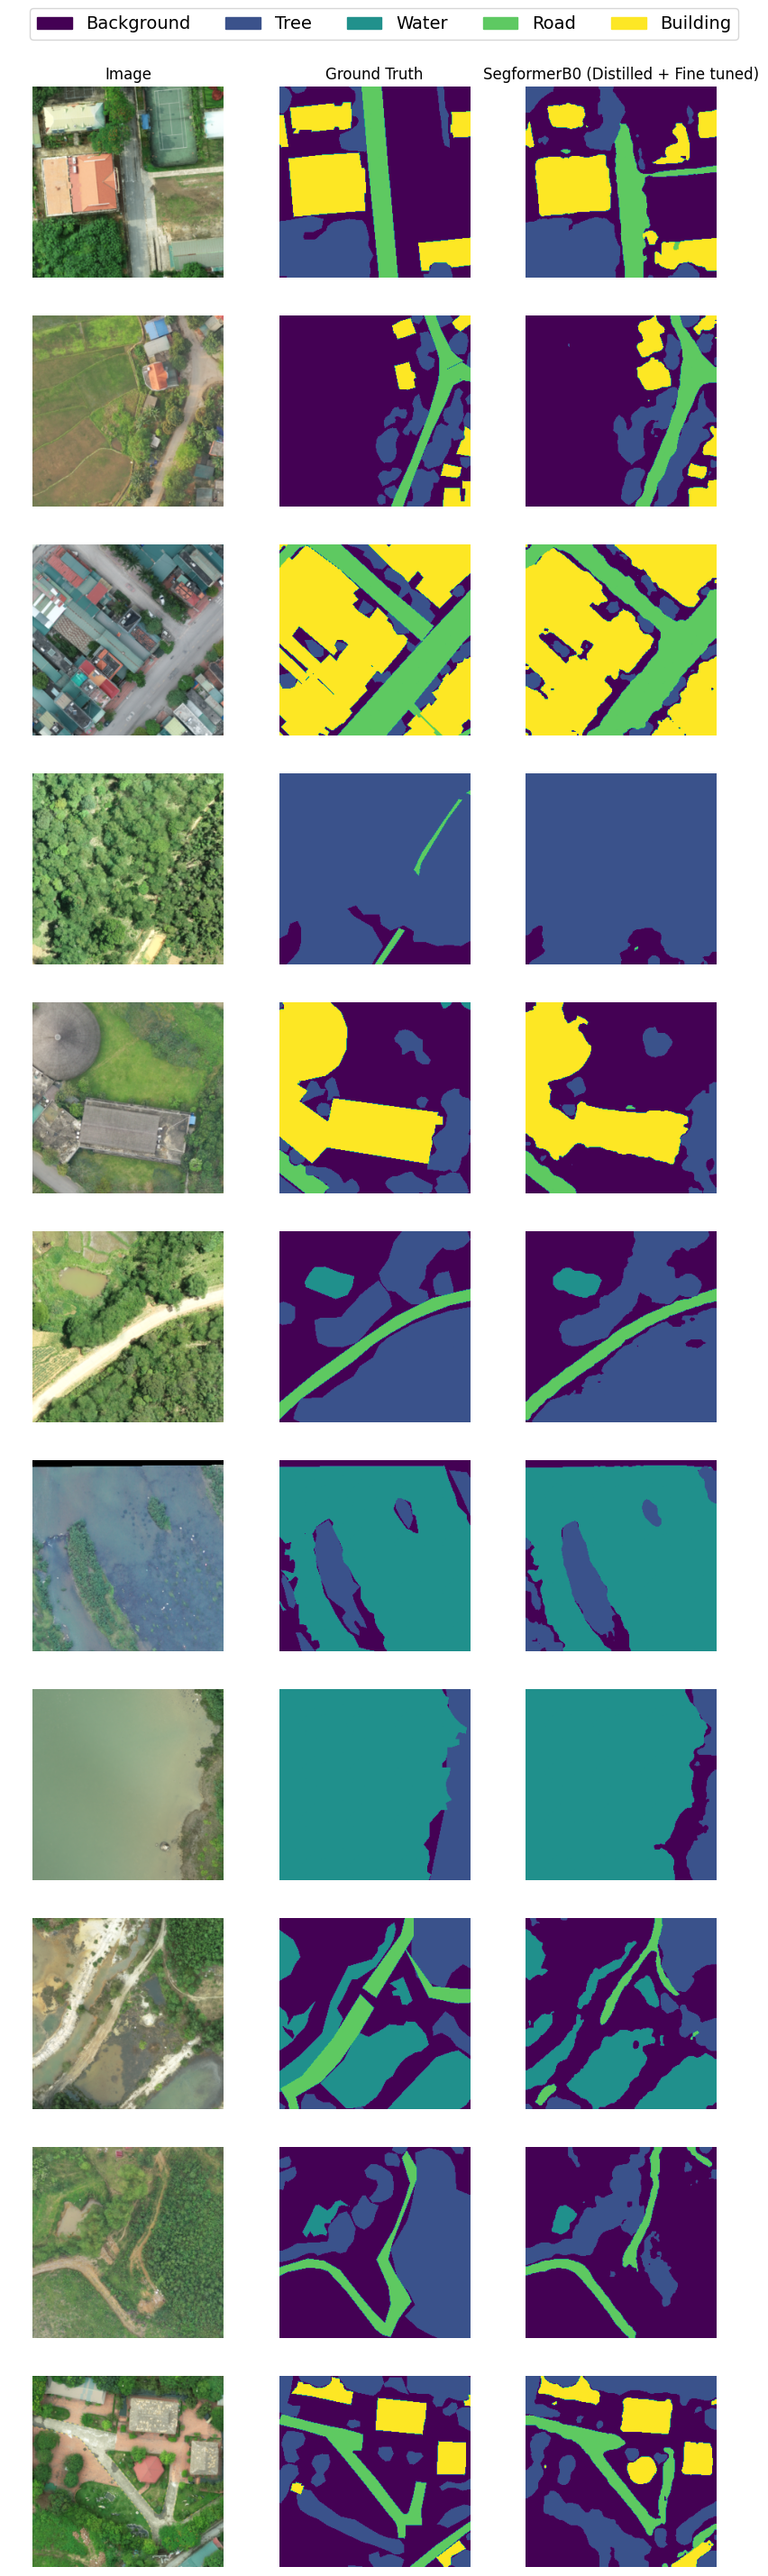

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

vmin = 0
vmax = 4

# Use a default Matplotlib colormap (tab10)
cmap = plt.get_cmap(lut=5)

# Define the boundaries for the colormap
bounds = [0, 1, 2, 3, 4, 5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)



# Placeholder lists to store images and titles
images = []
titles = []

for i in [116, 206, 79, 244, 326, 190, 0, 248, 202, 111, 253]:
    image_number = i

    # Original Image
    images.append(X_test[image_number])
    titles.append('Image')

    # Ground Truth
    true = y_test[image_number].argmax(axis=2)
    images.append(true)
    titles.append('Ground Truth')

    # Prediction
    prediction = model.predict(np.expand_dims(X_test[image_number], 0))[0].argmax(axis=2)
    images.append(prediction)
    titles.append(model_name)

# Plot all images in a single figure
fig, axes = plt.subplots(11, 3, figsize=(10, 32))
fig.subplots_adjust(top=0.97)

# Create custom legend patches using colors from the 'tab10' colormap
legend_labels = ['Background', 'Tree', 'Water', 'Road', 'Building']
colors = [cmap(i) for i in range(len(legend_labels))]
legend_handles = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(colors))]

# Add a custom legend for the classes
# handles = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
fig.legend(handles=legend_handles, loc='upper center', ncol=5, fontsize=14)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], vmin=vmin, vmax=vmax)
    if i < 3:
        ax.set_title(titles[i % 3])
    ax.axis('off')

# Save the figure to the specified folder and file name
folder = '../infer_image'
filename = file_name
filepath = os.path.join(folder, filename)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)
fig.savefig(filepath )

plt.show()


